In [ ]:
## WeatherPy

In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a [simple Python library](https://pypi.python.org/pypi/citipy), the [OpenWeatherMap API](https://openweathermap.org/api), and a little common sense to create a representative model of weather across world cities.

Your objective is to build a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

Your final notebook must:

* Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
* Perform a weather check on each of the cities using a series of successive API calls. 
* Include a print log of each city as it's being processed with the city number, city name, and requested URL.
* Save both a CSV of all data retrieved and png images for each scatter plot.

In [33]:
from citipy import citipy
import requests as req
import matplotlib.pyplot as plt
import pandas as pd
import csv
import random

In [65]:
weather_data =[]
req_url =[]

for i in range (0, 600):
    
    num = random.random()
    lat_int = random.randint(0,180)-90
    long_int =random.randint(0,360)-180
    lat = num*lat_int
    long = num*long_int
    
    #insert geocodes
    city = citipy.nearest_city(lat, long)
    city_name = city.city_name
    country_code = city.country_code

    # Build partial query URL
    url = "http://api.openweathermap.org/data/2.5/weather?"
    # api.openweathermap.org/data/2.5/weather?q={city name},{country code}
    # api.openweathermap.org/data/2.5/weather?q=London,uk
    api_key = "25bc90a1196e6f153eece0bc0b0fc9eb"
    units = "imperial"
    
    query_url = url + "appid=" + api_key + "&units=" + units + "&q="+'%s,%s' % (city_name, country_code)
    response = req.get(query_url).json()
    if response.get ('cod') != '404':
        weather_data.append(response)
        req_url.append(query_url)

In [66]:
# Extract interesting data from responses
city_data = [data.get("name") for data in weather_data]
city_code = [data.get('cod') for data in weather_data]
lat_data = [data.get("coord").get("lat") for data in weather_data]
temp_data = [data.get("main").get("temp") for data in weather_data]
humidity_data = [data.get("main").get("humidity") for data in weather_data]
cloudiness_data = [data.get("clouds").get("all") for data in weather_data]
windspeed_data = [data.get("wind").get("speed") for data in weather_data]

In [84]:
#citycount = len(city_data)
#citycount
#print(req_url[i])
for i in range (0,500):
    citynum = i+1
    print ('Processing city %s out of 500 | %s' %(citynum, city_data[i]))
    print (req_url[i])
    print('---------------------------------------------------------------------------------------------')

Processing city 1 out of 500 | Mopipi
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=mopipi,bw
---------------------------------------------------------------------------------------------
Processing city 2 out of 500 | Cayenne
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=cayenne,gf
---------------------------------------------------------------------------------------------
Processing city 3 out of 500 | Cidreira
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=cidreira,br
---------------------------------------------------------------------------------------------
Processing city 4 out of 500 | Ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=ushuaia,ar
---------------------------------------------------------------------------------------------
Processing c

In [102]:
weather_data_list = {"City Name": city_data, "City Number": city_code,"Latitude": lat_data, "Temperature": temp_data, 
                     "Humidity": humidity_data, "Cloudiness":cloudiness_data, "Windspeed" : windspeed_data, "URL" : req_url}
weather_data_pd = pd.DataFrame(weather_data_list)
weather_data_pd.to_csv("LatWeatherRelationship.csv", index =False)
weather_data_pd

City Name  City Number  Cloudiness  Humidity  Latitude  \
0             Mopipi          200          92        98    -21.20   
1            Cayenne          200          75        94      4.94   
2           Cidreira          200          44        85    -30.17   
3            Ushuaia          200          40        50    -54.81   
4              Amapa          200          88        94     -1.83   
5            Mumford          200          48        95      5.26   
6    Arraial do Cabo          200          80        94    -22.97   
7             Torbay          200          20        78     47.66   
8        New Norfolk          200          40        40    -42.78   
9             Touros          200           0        98     -5.20   
10            Albany          200          20        74    -35.02   
11            Chilca          200          75        62    -13.22   
12         Kilindoni          200           0       100     -7.91   
13         Cocobeach          200          75        88      1.01   
14           Kassala          200           0        67     15.45   
15         San-Pedro          200          80        84      4.75   
16            Maceio          200          40        83     -9.67   
17       Port-Gentil          200          92       100     -0.72   
18           Fomboni          200          12       100    -12.28   
19          Coquimbo          200           0        87    -29.95   
20           Itarema          200          92       100     -2.92   
21          Monrovia          200          20        87      6.33   
22     San Cristobal          200          64       100     -1.02   
23    Ribeira Grande          200          92       100     38.52   
24            Namibe          200           0       100    -15.19   
25             Lagoa          200          75       100     37.14   
26         Grindavik          200          75        93     63.84   
27              Lebu          200          56        94    -37.62   
28              Hilo          200          90        88     19.71   
29           Kangaba          200          64        66     11.94   
..               ...          ...         ...       ...       ...   
505         Maragogi          200         100       100     -9.01   
506        Kisangani          200          64       100      0.52   
507        Bathsheba          200          20        73     13.22   
508            Asosa          200           0        62     10.07   
509          Rikitea          200          24       100    -23.12   
510          Ushuaia          200          40        50    -54.81   
511             Hami          200          56        57     42.84   
512      Port-Gentil          200          92       100     -0.72   
513            Arona          200          40        67     28.10   
514           Taltal          200           0       100    -25.41   
515             Hovd          200          12        64     48.01   
516            Keita          200           8        61     14.76   
517            Lubao          200          56        84     -5.39   
518   Terekli-Mekteb          200          92        97     44.16   
519          Yenagoa          200          88        93      4.92   
520            Matam          200           0        65     15.66   
521   Saint-Philippe          200           0        78    -21.36   
522         Takoradi          200          80       100      4.89   
523     Puerto Ayora          200          92       100     -0.74   
524        Ugoofaaru          200          92        99      5.67   
525             Uaua          200           0        71     -9.84   
526             Axim          200          92        99      4.87   
527        Cape Town          200           0        71    -33.93   
528             Muli          200          48       100      2.92   
529          Senanga          200          92        98    -16.10   
530         Takoradi          200          80       100      4.89   
531      

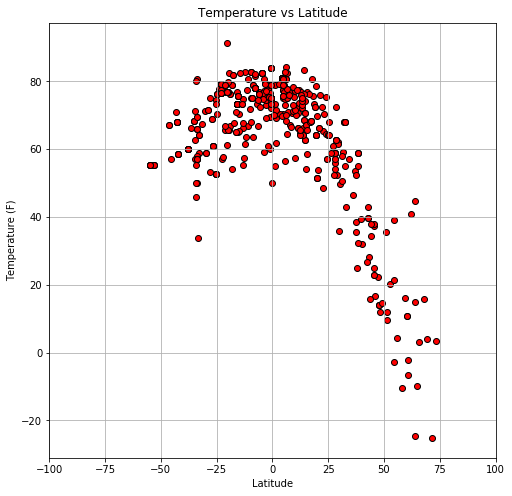

In [111]:
# Build a scatter plot for Temperature (F) vs. Latitude
plt.figure(figsize=(8, 8))
plt.scatter(weather_data_pd["Latitude"], weather_data_pd["Temperature"], marker="o",facecolors="red", edgecolors="black")

# Incorporate the other graph properties
plt.title("Temperature vs Latitude")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-100,100)


# Save the figure
plt.savefig("TempvsLat.png")

# Show plot
plt.show()

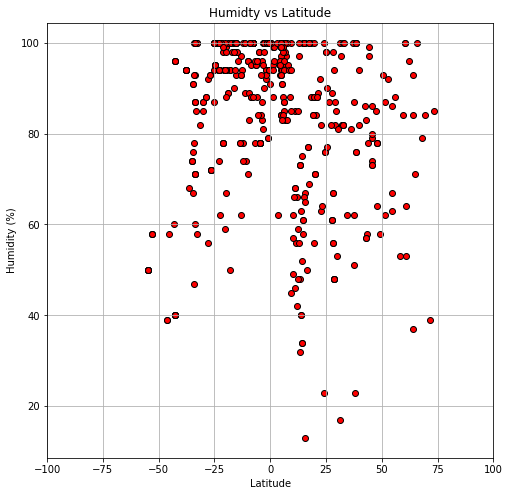

In [110]:
# Build a scatter plot for Humidity (%) vs. Latitude
plt.figure(figsize=(8, 8))
plt.scatter(weather_data_pd["Latitude"], weather_data_pd["Humidity"], marker="o",facecolors="red", edgecolors="black")

# Incorporate the other graph properties
plt.title("Humidty vs Latitude")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-100,100)


# Save the figure
plt.savefig("HumvsLat.png")

# Show plot
plt.show()

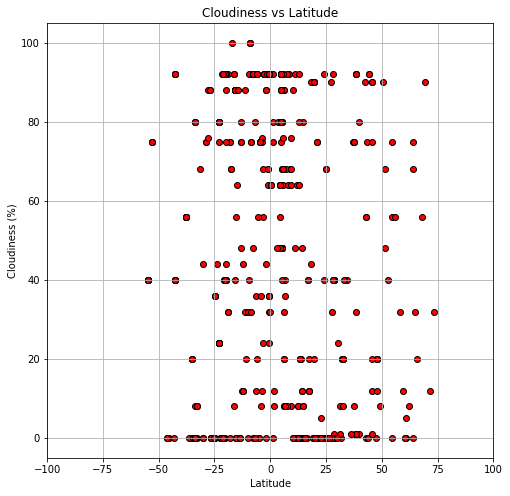

In [109]:
# Build a scatter plot for Cloudiness (%) vs. Latitude
plt.figure(figsize=(8, 8))
plt.scatter(weather_data_pd["Latitude"], weather_data_pd["Cloudiness"], marker="o",facecolors="red", edgecolors="black")

# Incorporate the other graph properties
plt.title("Cloudiness vs Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-100,100)


# Save the figure
plt.savefig("CloudvsLat.png")


# Show plot
plt.show()

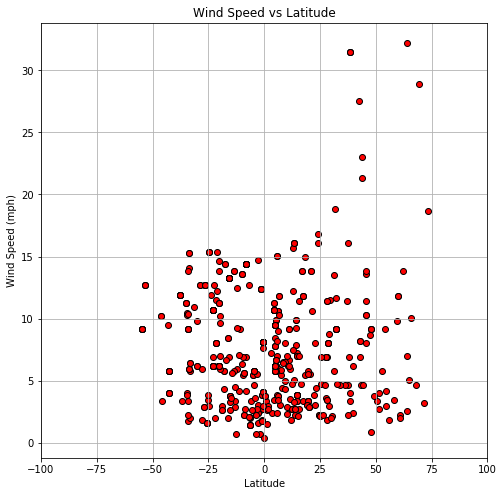

In [108]:
# Build a scatter plot for Wind Speed (mph) vs. Latitude
plt.figure(figsize=(8, 8))
plt.scatter(weather_data_pd["Latitude"], weather_data_pd["Windspeed"], marker="o",facecolors="red", edgecolors="black")

# Incorporate the other graph properties
plt.title("Wind Speed vs Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-100,100)


# Save the figure
plt.savefig("WSvsLat.png")


# Show plot
plt.show()